In [1]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import collections  as mc


In [6]:
midi_path = '../../../data/MIDI-Freestyle/Freestyle_1008.mid'

In [7]:
mf = m2.midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()
   

In [8]:
dir(mf)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_reprInternal',
 'classSet',
 'classes',
 'close',
 'file',
 'format',
 'headerId',
 'isClassOrSubclass',
 'open',
 'openFileLike',
 'read',
 'readstr',
 'ticksPerQuarterNote',
 'ticksPerSecond',
 'tracks',
 'write',
 'writeMThdStr',
 'writestr']

In [9]:
mf.ticksPerQuarterNote, mf.ticksPerSecond, mf.format

(96, None, 0)

In [10]:
dir(mf.tracks[0])

['_DOC_ATTR',
 '_DOC_ORDER',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_reprInternal',
 'classSet',
 'classes',
 'data',
 'events',
 'getBytes',
 'getChannels',
 'getProgramChanges',
 'hasNotes',
 'headerId',
 'index',
 'isClassOrSubclass',
 'length',
 'processDataToEvents',
 'read',
 'setChannel',
 'updateEvents']

In [12]:
mf.tracks[0].events

[<MidiEvent DeltaTime, t=0, track=0, channel=None>,
 <MidiEvent SEQUENCE_TRACK_NAME, t=0, track=0, channel=None, data=b'8 2-Marimba1 Classic\x00'>,
 <MidiEvent DeltaTime, t=0, track=0, channel=None>,
 <MidiEvent TIME_SIGNATURE, t=0, track=0, channel=None, data=b'\x04\x02$\x08'>,
 <MidiEvent DeltaTime, t=0, track=0, channel=None>,
 <MidiEvent TIME_SIGNATURE, t=0, track=0, channel=None, data=b'\x04\x02$\x08'>,
 <MidiEvent DeltaTime, t=995, track=0, channel=None>,
 <MidiEvent NOTE_ON, t=0, track=0, channel=1, pitch=48, velocity=70>,
 <MidiEvent DeltaTime, t=6, track=0, channel=None>,
 <MidiEvent NOTE_OFF, t=0, track=0, channel=1, pitch=48, velocity=64>,
 <MidiEvent DeltaTime, t=1, track=0, channel=None>,
 <MidiEvent NOTE_ON, t=0, track=0, channel=1, pitch=48, velocity=27>,
 <MidiEvent DeltaTime, t=12, track=0, channel=None>,
 <MidiEvent NOTE_OFF, t=0, track=0, channel=1, pitch=48, velocity=64>,
 <MidiEvent DeltaTime, t=68, track=0, channel=None>,
 <MidiEvent NOTE_ON, t=0, track=0, channel

In [13]:
ev = mf.tracks[0].events


In [14]:
df = pd.DataFrame(data=[e.__dict__ for e in ev])
df.insert(2,'type_str',df.type.map(lambda t: str(t).split('.')[-1]))
df.insert(4,'time_abs',df.time.cumsum())
df

,track,type,type_str,time,time_abs,channel,parameter1,parameter2,centShift,correspondingEvent,lastStatusByte
0,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
1,<music21.midi.MidiTrack 0 -- 9584 events>,MetaEvents.SEQUENCE_TRACK_NAME,SEQUENCE_TRACK_NAME,0,0,NaN,b'8 2-Marimba1 Classic\x00',NaN,None,None,255.0
2,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
3,<music21.midi.MidiTrack 0 -- 9584 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0
4,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9579,<music21.midi.MidiTrack 0 -- 9584 events>,ChannelVoiceMessages.NOTE_ON,NOTE_ON,0,33007,1.0,48,35.0,None,None,144.0
9580,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,12,33019,NaN,None,NaN,None,None,NaN
9581,<music21.midi.MidiTrack 0 -- 9584 events>,ChannelVoiceMessages.NOTE_OFF,NOTE_OFF,0,33019,1.0,48,64.0,None,None,128.0
9582,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,33019,NaN,None,NaN,None,None,NaN


In [15]:
all_events = {}
open_events = {}
for row in df[df.type_str.isin(['NOTE_ON','NOTE_OFF'])].itertuples():
    if row.type_str=='NOTE_ON':
        open_events[row.parameter1]=row.time_abs
    else:
        all_events[row.parameter1]=all_events.get(row.parameter1,[])+[(open_events[row.parameter1], row.time_abs)]


all_events;
    

In [16]:
event_queue = []
counters = [0]*3

keys = list(all_events.keys())
values = [[v[0] for v in val] for val in all_events.values()]

active = 3

lens = [len(v) for v in values]
while active:
    next_event_key = np.argmin([v[i] if i<len(v) else np.inf for v,i in zip(values,counters)])
    rec = (values[next_event_key][counters[next_event_key]],keys[next_event_key],counters.copy()) 
    print(counters,next_event_key,[v[i] for v,i in zip(values,counters)], rec)
    counters[next_event_key] += 1
    event_queue.append(rec)
    
    #print(' 1'[counters[next_event_key]==lens[next_event_key]],end='')
    active -= (counters[next_event_key]==lens[next_event_key])
    #if counters.max()==10: break

[0, 0, 0] 0 [995, 1086, 1089] (995, 48, [0, 0, 0])
[1, 0, 0] 0 [1002, 1086, 1089] (1002, 48, [1, 0, 0])
[2, 0, 0] 0 [1082, 1086, 1089] (1082, 48, [2, 0, 0])
[3, 0, 0] 1 [1090, 1086, 1089] (1086, 45, [3, 0, 0])
[3, 1, 0] 2 [1090, 1168, 1089] (1089, 43, [3, 1, 0])
[3, 1, 1] 0 [1090, 1168, 1167] (1090, 48, [3, 1, 1])
[4, 1, 1] 0 [1158, 1168, 1167] (1158, 48, [4, 1, 1])
[5, 1, 1] 2 [1168, 1168, 1167] (1167, 43, [5, 1, 1])
[5, 1, 2] 0 [1168, 1168, 1238] (1168, 48, [5, 1, 2])
[6, 1, 2] 1 [1245, 1168, 1238] (1168, 45, [6, 1, 2])
[6, 2, 2] 2 [1245, 1247, 1238] (1238, 43, [6, 2, 2])
[6, 2, 3] 0 [1245, 1247, 1325] (1245, 48, [6, 2, 3])
[7, 2, 3] 1 [1256, 1247, 1325] (1247, 45, [7, 2, 3])
[7, 3, 3] 0 [1256, 1325, 1325] (1256, 48, [7, 3, 3])
[8, 3, 3] 0 [1321, 1325, 1325] (1321, 48, [8, 3, 3])
[9, 3, 3] 1 [1328, 1325, 1325] (1325, 45, [9, 3, 3])
[9, 4, 3] 2 [1328, 1408, 1325] (1325, 43, [9, 4, 3])
[9, 4, 4] 0 [1328, 1408, 1399] (1328, 48, [9, 4, 4])
[10, 4, 4] 2 [1465, 1408, 1399] (1399, 43, [10, 

[130, 147, 99] 0 [6504, 6509, 6561] (6504, 48, [130, 147, 99])
[131, 147, 99] 1 [6557, 6509, 6561] (6509, 45, [131, 147, 99])
[131, 148, 99] 0 [6557, 6561, 6561] (6557, 48, [131, 148, 99])
[132, 148, 99] 1 [6610, 6561, 6561] (6561, 45, [132, 148, 99])
[132, 149, 99] 2 [6610, 6617, 6561] (6561, 43, [132, 149, 99])
[132, 149, 100] 0 [6610, 6617, 6616] (6610, 48, [132, 149, 100])
[133, 149, 100] 2 [6656, 6617, 6616] (6616, 43, [133, 149, 100])
[133, 149, 101] 1 [6656, 6617, 6681] (6617, 45, [133, 149, 101])
[133, 150, 101] 1 [6656, 6622, 6681] (6622, 45, [133, 150, 101])
[133, 151, 101] 0 [6656, 6669, 6681] (6656, 48, [133, 151, 101])
[134, 151, 101] 1 [6697, 6669, 6681] (6669, 45, [134, 151, 101])
[134, 152, 101] 2 [6697, 6716, 6681] (6681, 43, [134, 152, 101])
[134, 152, 102] 0 [6697, 6716, 6779] (6697, 48, [134, 152, 102])
[135, 152, 102] 1 [6741, 6716, 6779] (6716, 45, [135, 152, 102])
[135, 153, 102] 0 [6741, 6753, 6779] (6741, 48, [135, 153, 102])
[136, 153, 102] 1 [6784, 6753, 6779

[259, 303, 206] 2 [12189, 12196, 12117] (12117, 43, [259, 303, 206])
[259, 303, 207] 0 [12189, 12196, 12190] (12189, 48, [259, 303, 207])
[260, 303, 207] 2 [12274, 12196, 12190] (12190, 43, [260, 303, 207])
[260, 303, 208] 1 [12274, 12196, 12209] (12196, 45, [260, 303, 208])
[260, 304, 208] 2 [12274, 12270, 12209] (12209, 43, [260, 304, 208])
[260, 304, 209] 2 [12274, 12270, 12264] (12264, 43, [260, 304, 209])
[260, 304, 210] 1 [12274, 12270, 12347] (12270, 45, [260, 304, 210])
[260, 305, 210] 1 [12274, 12273, 12347] (12273, 45, [260, 305, 210])
[260, 306, 210] 0 [12274, 12349, 12347] (12274, 48, [260, 306, 210])
[261, 306, 210] 0 [12340, 12349, 12347] (12340, 48, [261, 306, 210])
[262, 306, 210] 2 [12361, 12349, 12347] (12347, 43, [262, 306, 210])
[262, 306, 211] 1 [12361, 12349, 12367] (12349, 45, [262, 306, 211])
[262, 307, 211] 0 [12361, 12365, 12367] (12361, 48, [262, 307, 211])
[263, 307, 211] 1 [12428, 12365, 12367] (12365, 45, [263, 307, 211])
[263, 308, 211] 2 [12428, 12439, 1

[371, 444, 297] 1 [17182, 17177, 17177] (17177, 45, [371, 444, 297])
[371, 445, 297] 2 [17182, 17181, 17177] (17177, 43, [371, 445, 297])
[371, 445, 298] 1 [17182, 17181, 17282] (17181, 45, [371, 445, 298])
[371, 446, 298] 0 [17182, 17528, 17282] (17182, 48, [371, 446, 298])
[372, 446, 298] 0 [17188, 17528, 17282] (17188, 48, [372, 446, 298])
[373, 446, 298] 2 [17292, 17528, 17282] (17282, 43, [373, 446, 298])
[373, 446, 299] 0 [17292, 17528, 17344] (17292, 48, [373, 446, 299])
[374, 446, 299] 0 [17344, 17528, 17344] (17344, 48, [374, 446, 299])
[375, 446, 299] 2 [17394, 17528, 17344] (17344, 43, [375, 446, 299])
[375, 446, 300] 0 [17394, 17528, 17405] (17394, 48, [375, 446, 300])
[376, 446, 300] 0 [17398, 17528, 17405] (17398, 48, [376, 446, 300])
[377, 446, 300] 2 [17613, 17528, 17405] (17405, 43, [377, 446, 300])
[377, 446, 301] 1 [17613, 17528, 17567] (17528, 45, [377, 446, 301])
[377, 447, 301] 2 [17613, 17700, 17567] (17567, 43, [377, 447, 301])
[377, 447, 302] 0 [17613, 17700, 1

[488, 569, 380] 2 [21348, 21348, 21342] (21342, 43, [488, 569, 380])
[488, 569, 381] 0 [21348, 21348, 21369] (21348, 48, [488, 569, 381])
[489, 569, 381] 1 [21354, 21348, 21369] (21348, 45, [489, 569, 381])
[489, 570, 381] 0 [21354, 21384, 21369] (21354, 48, [489, 570, 381])
[490, 570, 381] 2 [21377, 21384, 21369] (21369, 43, [490, 570, 381])
[490, 570, 382] 0 [21377, 21384, 21402] (21377, 48, [490, 570, 382])
[491, 570, 382] 0 [21382, 21384, 21402] (21382, 48, [491, 570, 382])
[492, 570, 382] 1 [21406, 21384, 21402] (21384, 45, [492, 570, 382])
[492, 571, 382] 2 [21406, 21416, 21402] (21402, 43, [492, 571, 382])
[492, 571, 383] 0 [21406, 21416, 21436] (21406, 48, [492, 571, 383])
[493, 571, 383] 0 [21412, 21416, 21436] (21412, 48, [493, 571, 383])
[494, 571, 383] 1 [21437, 21416, 21436] (21416, 45, [494, 571, 383])
[494, 572, 383] 2 [21437, 21447, 21436] (21436, 43, [494, 572, 383])
[494, 572, 384] 0 [21437, 21447, 21465] (21437, 48, [494, 572, 384])
[495, 572, 384] 0 [21442, 21447, 2

[595, 687, 471] 1 [24959, 24897, 24966] (24897, 45, [595, 687, 471])
[595, 688, 471] 0 [24959, 24959, 24966] (24959, 48, [595, 688, 471])
[596, 688, 471] 1 [25031, 24959, 24966] (24959, 45, [596, 688, 471])
[596, 689, 471] 2 [25031, 25024, 24966] (24966, 43, [596, 689, 471])
[596, 689, 472] 1 [25031, 25024, 25026] (25024, 45, [596, 689, 472])
[596, 690, 472] 2 [25031, 25090, 25026] (25026, 43, [596, 690, 472])
[596, 690, 473] 0 [25031, 25090, 25092] (25031, 48, [596, 690, 473])
[597, 690, 473] 1 [25098, 25090, 25092] (25090, 45, [597, 690, 473])
[597, 691, 473] 2 [25098, 25149, 25092] (25092, 43, [597, 691, 473])
[597, 691, 474] 0 [25098, 25149, 25164] (25098, 48, [597, 691, 474])
[598, 691, 474] 0 [25149, 25149, 25164] (25149, 48, [598, 691, 474])
[599, 691, 474] 1 [25159, 25149, 25164] (25149, 45, [599, 691, 474])
[599, 692, 474] 1 [25159, 25154, 25164] (25154, 45, [599, 692, 474])
[599, 693, 474] 0 [25159, 25226, 25164] (25159, 48, [599, 693, 474])
[600, 693, 474] 2 [25208, 25226, 2

[706, 814, 555] 1 [29186, 29118, 29188] (29118, 45, [706, 814, 555])
[706, 815, 555] 1 [29186, 29185, 29188] (29185, 45, [706, 815, 555])
[706, 816, 555] 0 [29186, 29226, 29188] (29186, 48, [706, 816, 555])
[707, 816, 555] 2 [29222, 29226, 29188] (29188, 43, [707, 816, 555])
[707, 816, 556] 0 [29222, 29226, 29225] (29222, 48, [707, 816, 556])
[708, 816, 556] 2 [29258, 29226, 29225] (29225, 43, [708, 816, 556])
[708, 816, 557] 1 [29258, 29226, 29263] (29226, 45, [708, 816, 557])
[708, 817, 557] 0 [29258, 29263, 29263] (29258, 48, [708, 817, 557])
[709, 817, 557] 1 [29264, 29263, 29263] (29263, 45, [709, 817, 557])
[709, 818, 557] 2 [29264, 29269, 29263] (29263, 43, [709, 818, 557])
[709, 818, 558] 0 [29264, 29269, 29343] (29264, 48, [709, 818, 558])
[710, 818, 558] 1 [29340, 29269, 29343] (29269, 45, [710, 818, 558])
[710, 819, 558] 0 [29340, 29340, 29343] (29340, 48, [710, 819, 558])
[711, 819, 558] 1 [29383, 29340, 29343] (29340, 45, [711, 819, 558])
[711, 820, 558] 2 [29383, 29378, 2

IndexError: list index out of range

In [17]:
x= [x[0] for x in event_queue]
y = np.vstack([x[2] for x in event_queue])
y

array([[  0,   0,   0],
       [  1,   0,   0],
       [  2,   0,   0],
       ...,
       [817, 928, 642],
       [818, 928, 642],
       [819, 928, 642]])

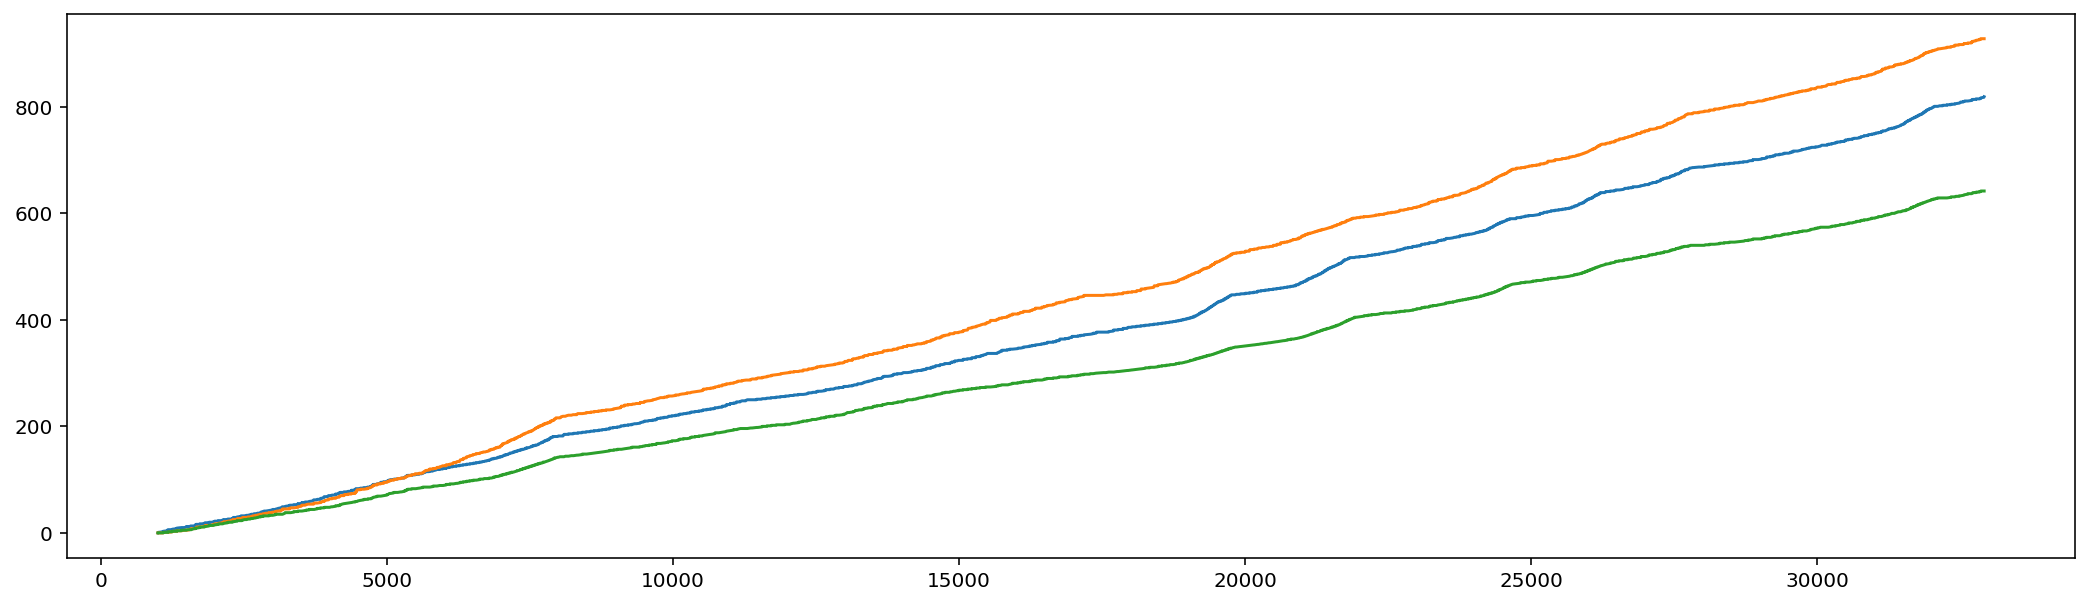

In [18]:
plt.figure(figsize=(18,5))
plt.plot(x,y)


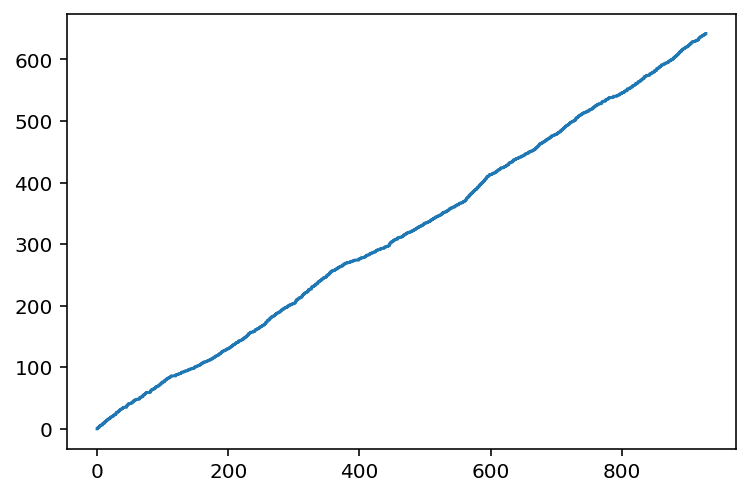

In [19]:
plt.plot(y[:,1],y[:,2])

In [20]:
y.shape

(2390, 3)

In [22]:
y[50,:]

array([21, 15, 14])

In [ ]:
lens

In [ ]:
np.all(np.diff(x)>=0)

In [ ]:
plt.plot(x)

In [ ]:
np.diff(values[2])